In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dash
import plotly.express as px
import re
import numpy as np
import plotly.graph_objects as go

In [17]:
from dash import dcc
from dash import html
import dash_table

C:\Users\bernc\AppData\Local\Temp\ipykernel_31948\1785242812.py:3: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`



In [18]:
df = pd.read_csv('dataframe.csv')
# Converter a coluna 'Data de Publicação' para datetime
df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'])
df

,Título,Visualizações,Likes,Data de Publicação,Comentários,Duração,Regiões Restritas,Taxa de Engajamento
0,2024 Abu Dhabi Grand Prix,829660,38746,2024-12-08 16:10:25+00:00,2170,00:08:10,"['BY', 'RU']",4.93
1,2024 Qatar Grand Prix,5036414,99458,2024-12-03 14:01:35+00:00,4472,00:08:04,"['BY', 'RU']",2.06
2,2024 Las Vegas Grand Prix,6433037,136880,2024-11-28 17:07:39+00:00,4408,00:08:15,"['BY', 'RU']",2.20
3,2024 Sao Paulo Grand Prix,7981373,154697,2024-11-04 14:19:44+00:00,9872,00:08:10,"['BY', 'RU']",2.06
4,2024 Mexico City Grand Prix,6429057,129644,2024-10-28 09:22:41+00:00,5973,00:08:14,"['BY', 'RU']",2.11
5,2024 United States Grand Prix,5900090,116240,2024-10-25 00:31:26+00:00,7478,00:08:15,"['BY', 'RU']",2.10
6,2024 Singapore Grand Prix,5649094,103867,2024-10-25 00:31:26+00:00,3199,00:07:57,"['BY', 'RU']",1.90
7,2024 Azerbaijan Grand Prix,6882044,138679,2024-09-15 15:59:47+00:00,7501,00:08:11,"['BY', 'RU']",2.12
8,2024 Italian Grand Prix,6667731,138484,2024-09-04 14:35:01+00:00,5479,00:08:15,"['BY', 'RU']",2.16
9,2024 Dutch Grand Prix,5725978,113063,2024-08-25 19:49:01+00:00,3564,00:08:01,"['BY', 'RU']",2.04


#### Gráfico 3

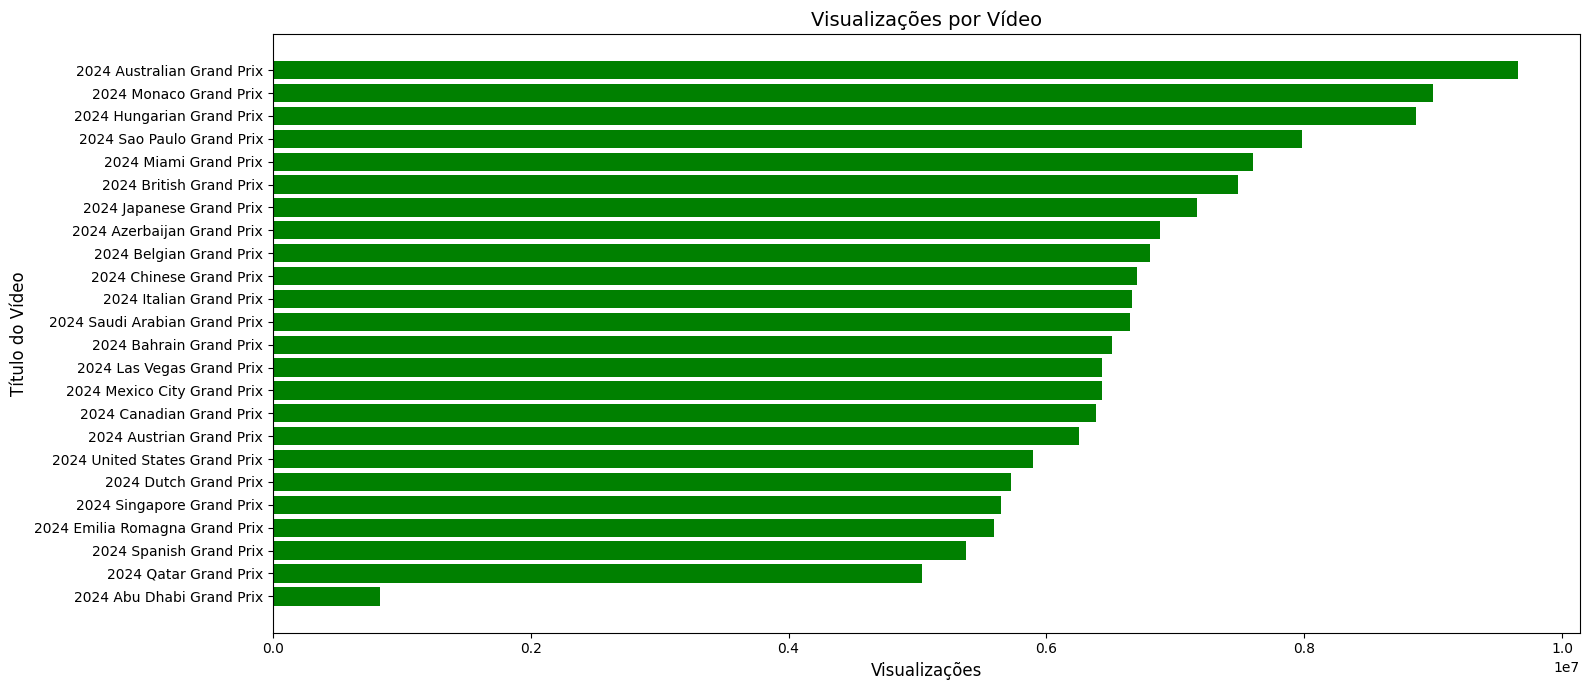

In [21]:
df_sorted_visu = df.sort_values(by="Visualizações")

plt.figure(figsize=(16, 7))
plt.barh(df_sorted_visu['Título'], df_sorted_visu['Visualizações'], color='green')
plt.title('Visualizações por Vídeo', fontsize=14)
plt.xlabel('Visualizações', fontsize=12)
plt.ylabel('Título do Vídeo', fontsize=12)
# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [130]:
# Inicializando o app Dash
app = dash.Dash(__name__)

# Gráficos principais
figura_views = px.line(df, x='Data de Publicação', y='Visualizações', title="Visualizações ao Longo do Tempo")
figura_views.update_layout(xaxis_title='Data de Publicação', yaxis_title='Visualizações', plot_bgcolor='#1f1f1f', paper_bgcolor='#1f1f1f', font_color='white')

figura_engajamento = px.scatter(df, x='Data de Publicação', y='Taxa de Engajamento', title="Engajamento ao Longo do Tempo")
figura_engajamento.update_traces(marker=dict(color='#ff33cc', size=8))
figura_engajamento.update_layout(plot_bgcolor='#1f1f1f', paper_bgcolor='#1f1f1f', font_color='white')

# Gráfico de Heatmap
heatmap_fig = px.density_heatmap(df, x='Visualizações', y='Taxa de Engajamento', 
                                 title="Heatmap: Visualizações vs Taxa de Engajamento", 
                                 color_continuous_scale="Viridis")
heatmap_fig.update_layout(plot_bgcolor='#1f1f1f', paper_bgcolor='#1f1f1f', font_color='white')

# Gráfico de Pizza
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1%', '1-2%', '2-3%', '3-4%', '4-5%']
df['Taxa de Engajamento Faixa'] = pd.cut(df['Taxa de Engajamento'], bins=bins, labels=labels)
pie_chart_fig = px.pie(df, names='Taxa de Engajamento Faixa', title="Distribuição de Taxa de Engajamento por Faixa")
pie_chart_fig.update_layout(plot_bgcolor='#1f1f1f', paper_bgcolor='#1f1f1f', font_color='white')

# Gráfico de Dispersão
scatter_fig = px.scatter(df, x='Visualizações', y='Likes', title="Dispersão: Visualizações vs Likes",
                         labels={'Visualizações': 'Visualizações', 'Likes': 'Likes'})
scatter_fig.update_layout(plot_bgcolor='#1f1f1f', paper_bgcolor='#1f1f1f', font_color='white')

# Ajustando os gráficos de barra para garantir que os títulos dos vídeos se alinhem corretamente
figura_visualizacoes_video = px.bar(df, y='Título', x='Visualizações', title='Visualizações por Vídeo', orientation='h')
figura_visualizacoes_video.update_layout(
    xaxis_title='Visualizações', 
    yaxis_title='Título do Vídeo', 
    plot_bgcolor='#1f1f1f', 
    paper_bgcolor='#1f1f1f', 
    font_color='white',
    yaxis=dict(
        tickmode='array',
        tickvals=df['Título'],
        ticktext=df['Título'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x),
    ),
    barmode='stack',  # Ajusta a forma das barras para ficarem mais compactas
    autosize=True
)

figura_likes_video = px.bar(df, y='Título', x='Likes', title='Likes por Vídeo', orientation='h')
figura_likes_video.update_layout(
    xaxis_title='Likes', 
    yaxis_title='Título do Vídeo', 
    plot_bgcolor='#1f1f1f', 
    paper_bgcolor='#1f1f1f', 
    font_color='white',
    yaxis=dict(
        tickmode='array',
        tickvals=df['Título'],
        ticktext=df['Título'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x),  
    ),
    barmode='stack',
    autosize=True
)

figura_comentarios_video = px.bar(df, y='Título', x='Comentários', title='Comentários por Vídeo', orientation='h')
figura_comentarios_video.update_layout(
    xaxis_title='Comentários', 
    yaxis_title='Título do Vídeo', 
    plot_bgcolor='#1f1f1f', 
    paper_bgcolor='#1f1f1f', 
    font_color='white',
    yaxis=dict(
        tickmode='array',
        tickvals=df['Título'],
        ticktext=df['Título'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x), 
    ),
    barmode='stack',
    autosize=True
)

figura_engajamento_video = px.bar(df, y='Título', x='Taxa de Engajamento', title='Taxa de Engajamento por Vídeo', orientation='h')
figura_engajamento_video.update_layout(
    xaxis_title='Taxa de Engajamento (%)', 
    yaxis_title='Título do Vídeo', 
    plot_bgcolor='#1f1f1f', 
    paper_bgcolor='#1f1f1f', 
    font_color='white',
    yaxis=dict(
        tickmode='array',
        tickvals=df['Título'],
        ticktext=df['Título'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x),  
    ),
    barmode='stack',
    autosize=True
)

# Layout do Dashboard
app.layout = html.Div(children=[

    # Cabeçalho com título e descrição
    html.Div(children=[ 
        html.H1("Análise de Highlights das Corridas de Fórmula 1 2024", style={
            'text-align': 'center',
            'color': '#8837e6',
            'font-family': 'Arial Black, sans-serif',
            'font-size': '36px',
            'font-weight': 'bold',
            'padding-top': '20px',
            'margin-bottom': '10px'
        }),
        html.P("Análise interativa dos vídeos da temporada 2024 da F1. Performance dos vídeos em termos de engajamento e visualizações", style={
            'text-align': 'center',
            'font-size': '16px',
            'color': '#b0b0b0',
            'font-family': 'Lexend, sans-serif',
            'margin-bottom': '30px'
        }),
    ], style={'background-color': '#111', 'padding': '40px'}),

    # Seção de Widgets e Gráficos
    html.Div(children=[

        # Widgets de Informações Importantes
        html.Div(children=[ 
            html.Div(children=[
                html.H3("Total de Visualizações", style={'color': '#8837e6', 'font-family': 'Arial Black, sans-serif', 'font-size': '20px'}),
                html.P(f"{df['Visualizações'].sum():,}", style={'color': '#fff', 'font-size': '24px', 'font-family': 'Lexend, sans-serif'}),
            ], style={
                'padding': '15px', 'background-color': '#333', 'border-radius': '10px', 'text-align': 'center', 'width': '23%', 'margin': '10px'
            }),
            html.Div(children=[
                html.H3("Média de Likes", style={'color': '#8837e6', 'font-family': 'Arial Black, sans-serif', 'font-size': '20px'}),
                html.P(f"{df['Likes'].mean():,.0f}", style={'color': '#fff', 'font-size': '24px', 'font-family': 'Lexend, sans-serif'}),
            ], style={
                'padding': '15px', 'background-color': '#333', 'border-radius': '10px', 'text-align': 'center', 'width': '23%', 'margin': '10px'
            }),
            html.Div(children=[
                html.H3("Média de Comentários", style={'color': '#8837e6', 'font-family': 'Arial Black, sans-serif', 'font-size': '20px'}),
                html.P(f"{df['Comentários'].mean():,.0f}", style={'color': '#fff', 'font-size': '24px', 'font-family': 'Lexend, sans-serif'}),
            ], style={
                'padding': '15px', 'background-color': '#333', 'border-radius': '10px', 'text-align': 'center', 'width': '23%', 'margin': '10px'
            }),
        ], style={'display': 'flex', 'justify-content': 'space-between', 'flex-wrap': 'wrap', 'margin-bottom': '20px'}),

        # Dropdowns para selecionar gráficos
        html.Div(children=[
            html.Div(children=[
                html.H3("Selecione o Gráfico", style={'color': '#ff33cc', 'font-family': 'Arial Black, sans-serif', 'font-size': '20px'}),
                dcc.Dropdown(
                    id='filter-dropdown-left',
                    options=[
                        {'label': 'Visualizações ao Longo do Tempo', 'value': 'views'},
                        {'label': 'Engajamento ao Longo do Tempo', 'value': 'engagement'},
                        {'label': 'Heatmap: Visualizações vs Taxa de Engajamento', 'value': 'heatmap'},
                        {'label': 'Dispersão: Visualizações vs Likes', 'value': 'scatter'},
                        {'label': 'Distribuição de Taxa de Engajamento por Faixa', 'value': 'pie_chart'},
                    ],
                    value='views', 
                    style={'background-color': '#555', 'color': '#8837e6', 'font-family': 'Lexend, sans-serif', 'border': '1px solid #444', 'border-radius': '5px'}
                )
            ], style={'width': '48%', 'margin': '0 auto', 'padding-bottom': '20px'}),

            html.Div(children=[
                html.H3("Selecione o Gráfico", style={'color': '#ff33cc', 'font-family': 'Arial Black, sans-serif', 'font-size': '20px'}),
                dcc.Dropdown(
                    id='filter-dropdown-right',
                    options=[
                        {'label': 'Visualizações por Vídeo', 'value': 'visualizations_video'},
                        {'label': 'Likes por Vídeo', 'value': 'likes_video'},
                        {'label': 'Comentários por Vídeo', 'value': 'comments_video'},
                        {'label': 'Taxa de Engajamento por Vídeo', 'value': 'engagement_rate_video'},
                    ],
                    value='visualizations_video', 
                    style={'background-color': '#555', 'color': '#8837e6', 'font-family': 'Lexend, sans-serif', 'border': '1px solid #444', 'border-radius': '5px'}
                )
            ], style={'width': '48%', 'margin': '0 auto', 'padding-bottom': '10px'}),
        ], style={'display': 'flex', 'justify-content': 'space-between'}),

        # Exibição dos Gráficos com base na seleção
        html.Div(children=[
            dcc.Graph(id='filter-graph-left', figure=figura_views, style={'width': '49%', 'display': 'inline-block'}),
            dcc.Graph(id='filter-graph-right', figure=figura_visualizacoes_video, style={'width': '49%', 'display': 'inline-block'})
        ], style={'display': 'flex', 'justify-content': 'space-between', 'margin-bottom': '40px'})
        
    ], style={'padding': '30px', 'background-color': '#111',  'color': 'white'})

])

# Função para atualizar os gráficos com base no dropdown
@app.callback(
    [dash.dependencies.Output('filter-graph-left', 'figure'),
     dash.dependencies.Output('filter-graph-right', 'figure')],
    [dash.dependencies.Input('filter-dropdown-left', 'value'),
     dash.dependencies.Input('filter-dropdown-right', 'value')]
)
def update_graph(selected_left, selected_right):

    figure_left = figura_views
    figure_right = figura_visualizacoes_video

    # Lógica para o gráfico da esquerda
    if selected_left == 'views':
        figure_left = figura_views
    elif selected_left == 'engagement':
        figure_left = figura_engajamento
    elif selected_left == 'heatmap':
        figure_left = heatmap_fig
    elif selected_left == 'scatter':
        figure_left = scatter_fig
    elif selected_left == 'pie_chart':
        figure_left = pie_chart_fig

    # Lógica para o gráfico da direita
    if selected_right == 'visualizations_video':
        figure_right = figura_visualizacoes_video
    elif selected_right == 'likes_video':
        figure_right = figura_likes_video
    elif selected_right == 'comments_video':
        figure_right = figura_comentarios_video
    elif selected_right == 'engagement_rate_video':
        figure_right = figura_engajamento_video

    return figure_left, figure_right


In [131]:
# Rodar o servidor diretamente no Jupyter Notebook
app.run_server(debug=True, mode="inline")